In [1]:
import torch
import torch.nn as nn

from torchvision import transforms

from PIL import Image

In [2]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/Ebs6XES37otLgWW5cavCY9YByGOnXJD5wC0WZgQPp8vAJg?download=1 -O decoder.pth
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EXzxBZI0seBFuxucQjlShBEBtM7X5-Lmj-ceqZ5Fu96alA?download=1 -O vgg_normalised.pth

--2021-09-29 19:34:50--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/Ebs6XES37otLgWW5cavCY9YByGOnXJD5wC0WZgQPp8vAJg?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 13.107.138.9, 13.107.136.9
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|13.107.138.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/Research/models/AdaIN%20Style%20Transfer/decoder.pth?originalPath=aHR0cHM6Ly9wb3N0ZWNoYWNrci1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb25nYmlubmFfcG9zdGVjaF9hY19rci9FYnM2WEVTMzdvdExnV1c1Y2F2Q1k5WUJ5R09uWEpENXdDMFdaZ1FQcDh2QUpnP3J0aW1lPThPUnp3elNEMlVn [following]
--2021-09-29 19:34:50--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/Research/models/AdaIN%20Style%20Transfer/decoder.pth?originalPath=aHR0cHM6Ly9wb3N0ZWNoYWNrci1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb25nYmlubmFfcG9

 11850K .......... .......... .......... .......... .......... 86% 13.1M 0s
 11900K .......... .......... .......... .......... .......... 87% 6.98M 0s
 11950K .......... .......... .......... .......... .......... 87%  169M 0s
 12000K .......... .......... .......... .......... .......... 87% 11.7M 0s
 12050K .......... .......... .......... .......... .......... 88% 8.47M 0s
 12100K .......... .......... .......... .......... .......... 88% 12.5M 0s
 12150K .......... .......... .......... .......... .......... 89% 11.4M 0s
 12200K .......... .......... .......... .......... .......... 89%  110M 0s
 12250K .......... .......... .......... .......... .......... 89% 4.69M 0s
 12300K .......... .......... .......... .......... .......... 90% 16.3M 0s
 12350K .......... .......... .......... .......... .......... 90%  415M 0s
 12400K .......... .......... .......... .......... .......... 90% 10.0M 0s
 12450K .......... .......... .......... .......... .......... 91% 11.7M 0s
 12500K ....

  3900K .......... .......... .......... .......... ..........  5% 11.2M 7s
  3950K .......... .......... .......... .......... ..........  5% 24.0M 7s
  4000K .......... .......... .......... .......... ..........  5% 13.3M 7s
  4050K .......... .......... .......... .......... ..........  5% 19.6M 7s
  4100K .......... .......... .......... .......... ..........  5% 7.78M 7s
  4150K .......... .......... .......... .......... ..........  5% 11.6M 7s
  4200K .......... .......... .......... .......... ..........  5% 8.68M 7s
  4250K .......... .......... .......... .......... ..........  5% 9.82M 7s
  4300K .......... .......... .......... .......... ..........  5% 11.1M 7s
  4350K .......... .......... .......... .......... ..........  5% 12.8M 7s
  4400K .......... .......... .......... .......... ..........  5% 10.2M 7s
  4450K .......... .......... .......... .......... ..........  5% 5.87M 7s
  4500K .......... .......... .......... .......... ..........  5% 8.73M 7s
  4550K ....

 18500K .......... .......... .......... .......... .......... 23% 10.4M 5s
 18550K .......... .......... .......... .......... .......... 23% 12.8M 5s
 18600K .......... .......... .......... .......... .......... 23% 12.4M 5s
 18650K .......... .......... .......... .......... .......... 23% 11.0M 5s
 18700K .......... .......... .......... .......... .......... 23% 12.9M 5s
 18750K .......... .......... .......... .......... .......... 24% 44.0M 5s
 18800K .......... .......... .......... .......... .......... 24% 5.14M 5s
 18850K .......... .......... .......... .......... .......... 24% 13.8M 5s
 18900K .......... .......... .......... .......... .......... 24% 8.34M 5s
 18950K .......... .......... .......... .......... .......... 24% 12.8M 5s
 19000K .......... .......... .......... .......... .......... 24% 12.1M 5s
 19050K .......... .......... .......... .......... .......... 24% 11.6M 5s
 19100K .......... .......... .......... .......... .......... 24%  138M 5s
 19150K ....

In [4]:
import load_vgg_decoder

device = torch.device("cuda")

vgg, decoder = load_vgg_decoder.load(vgg_path="./vgg_normalised.pth", decoder_path="./decoder.pth", device=device)

In [5]:
def style_(feature, eps=1e-5):
    N, C = feature.size()[:2]
    
    feature = feature.reshape(N, C, -1)
    
    mean = feature.mean(dim=2).reshape(N, C, 1, 1)
    std = (feature.var(dim=2) + eps).sqrt().reshape(N, C, 1, 1)
    
    return mean, std

In [13]:
def adain_normalization(content_f, style_f):
    size = content_f.size()
    
    style_mean, style_std = style_(style_f)
    content_mean, content_std = style_(content_f)
    
    style_mean, style_std = style_mean.expand(size), style_std.expand(size)
    content_mean, content_std = content_mean.expand(size), content_std.expand(size)
    
    normalized_f = (content_f - content_mean) / content_std
    normalized_f = style_std * normalized_f + style_mean
    
    return normalized_f

In [14]:
def interpolation(content, styles, weights):
    content_f = vgg(content)
    style_fs = [vgg(style) for style in styles]
    
    feature = sum([weights[i] * adain_normalization(content_f, style_fs[i]) for i in range(len(style_fs))])
    
    return decoder(feature)

In [36]:
content_img = Image.open("./content.jpg").convert("RGB").resize((256, 256))
style_img = Image.open("./style_house.jpg").convert("RGB").resize((256, 256))

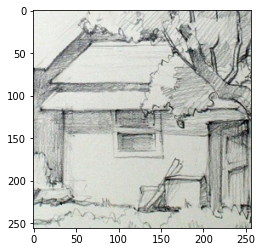

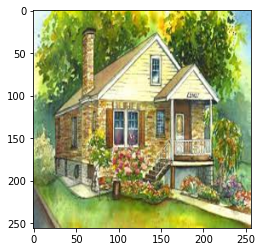

In [37]:
import matplotlib.pyplot as plt

plt.imshow(content_img)
plt.show()

plt.imshow(style_img)
plt.show()

In [42]:
def transform(size=128): return transforms.Compose([transforms.Resize(size), transforms.ToTensor()])

content = transform(size=256)(content_img).to(device).unsqueeze(0)
style = transform(size=256)(style_img).to(device).unsqueeze(0)

coloring_result = interpolation(content, [style], [0.5])

In [43]:
import gc

torch.cuda.empty_cache()
gc.collect()

68

In [44]:
coloring_result = coloring_result.cpu().detach().numpy()
print(coloring_result.shape)

(1, 3, 256, 256)


In [45]:
import numpy as np

coloring_result = coloring_result[0]

result = np.zeros((256, 256, 3))

for i in range(256):
    for j in range(256):
        result[i, j] = coloring_result[:, i, j]
        
print(result.shape)

(256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


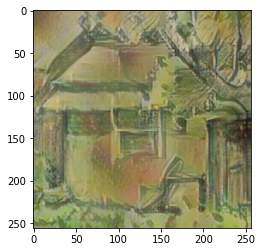

In [46]:
plt.imshow(result)

In [57]:
class AutoColoring:
    
    
    def __init__(self, content_path, style_paths, device, vgg, decoder, size, weights):
        self.content_img = Image.open(content_path).convert("RGB").resize(size)
        self.style_imgs = [Image.open(style_path).convert("RGB").resize(size) for style_path in style_paths]
        
        self.device = device
        self.vgg = vgg
        self.decoder = decoder
        self.size = size
        self.weights = weights
        
        
    def decode3shape(self, coloring_result):
        coloring_result = coloring_result[0]
        
        result = np.zeros((*self.size, 3))
        
        for i in range(self.size[0]):
            for j in range(self.size[0]):
                result[i, j] = coloring_result[:, i, j]
                
        return result
    
    
    def transform(self):
        return transforms.Compose([transforms.ToTensor()])
    
    
    def style_(self, feature, eps=1e-5):
        N, C = feature.size()[:2]

        feature = feature.reshape(N, C, -1)

        mean = feature.mean(dim=2).reshape(N, C, 1, 1)
        std = (feature.var(dim=2) + eps).sqrt().reshape(N, C, 1, 1)

        return mean, std
    
    
    def adain_normalization(self, content_f, style_f):
        size = content_f.size()

        style_mean, style_std = style_(style_f)
        content_mean, content_std = style_(content_f)

        style_mean, style_std = style_mean.expand(size), style_std.expand(size)
        content_mean, content_std = content_mean.expand(size), content_std.expand(size)

        normalized_f = (content_f - content_mean) / content_std
        normalized_f = style_std * normalized_f + style_mean

        return normalized_f
    
    
    def interpolation(self, content, styles):
        content_f = vgg(content)
        style_fs = [vgg(style) for style in styles]

        feature = sum([self.weights[i] * self.adain_normalization(content_f, style_fs[i]) for i in range(len(style_fs))])

        return decoder(feature)
    
    
    def result_(self):
        content = self.transform()(self.content_img).to(self.device).unsqueeze(0)
        styles = []
        for i in range(len(self.style_imgs)):
            styles.append(self.transform()(self.style_imgs[i]).to(self.device).unsqueeze(0))
            
        coloring_result = self.interpolation(content, styles)
                            
        torch.cuda.empty_cache()
        gc.collect()
                                        
        coloring_result = coloring_result.cpu().detach().numpy()
        
        coloring_result = self.decode3shape(coloring_result)
        
        return coloring_result

In [62]:
auto_coloring = AutoColoring(content_path="./content.jpg", style_paths=["./style_house.jpg"], device=device,
                            vgg=vgg, decoder=decoder, size=(256, 256), weights=[1.0])

coloring_result = auto_coloring.result_()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


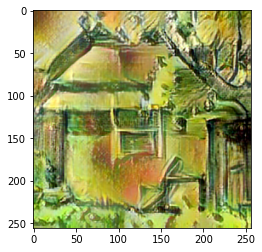

In [63]:
plt.imshow(coloring_result)

weight: 0.0


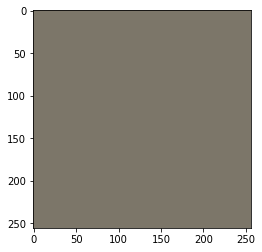

weight: 0.1


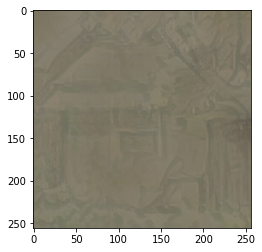

weight: 0.2


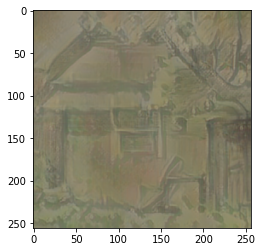

weight: 0.3


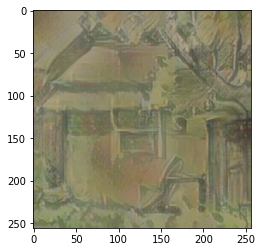

weight: 0.4


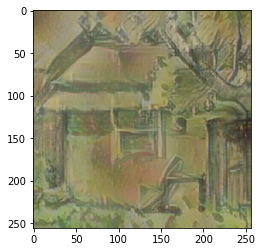

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


weight: 0.5


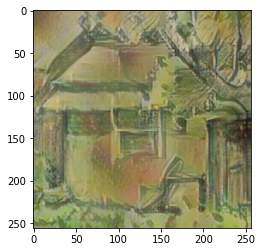

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


weight: 0.6


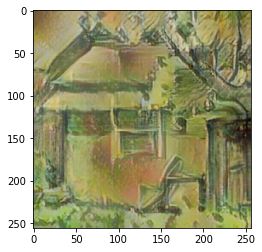

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


weight: 0.7


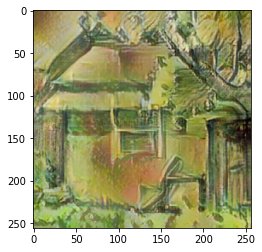

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


weight: 0.8


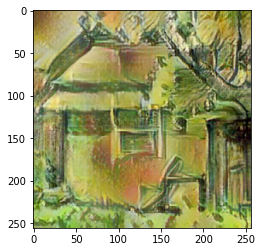

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


weight: 0.9


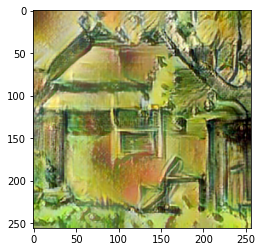

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


weight: 1.0


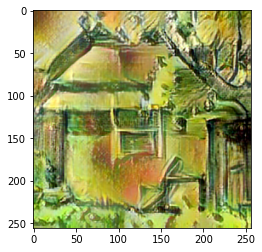

In [65]:
for i in range(11):
    auto_coloring = AutoColoring(content_path="./content.jpg", style_paths=["./style_house.jpg"], device=device, 
                                 vgg=vgg, decoder=decoder, size=(256, 256), weights=[i/10])

    coloring_result = auto_coloring.result_()
    
    print(f"weight: {i/10}")
    plt.imshow(coloring_result)
    plt.show()